# Metrics (confusion matrix, MSE, MAE)

## Confusion Matrix

- to know the performance of CLASSIFICATION
- comparision beetween ACTUAL and PREDICTED values
- matrix number of rows and columns depends of NUMBER OF CLASSES

In [6]:
# Creation of confusion matrix in using sklearn
from sklearn.metrics import confusion_matrix

#Let actual value be 1 for apple and 0 grapes for our example
ACTUAL = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

# Let the predicted values be
PREDICTION= [1,0,0,0,1,1,1,1,0,0,0,0,0,1,1]

# Confusion matrix for actual and predicted values.
matrix = confusion_matrix(ACTUAL,PREDICTION, labels=[1,0])
print('Confusion matrix : n',matrix)

# outcome values order in sklearn
TP, FN, FP, TN = confusion_matrix(ACTUAL,PREDICTION,labels=[1,0]).reshape(-1)
print('Outcome values : n', TP, FN, FP, TN)

Confusion matrix : n [[5 3]
 [2 5]]
Outcome values : n 5 3 2 5


### How to read it?

- we are looking for 4 values, for each class
    - TP, true positive is Actual = Predicted
    - FP, false positive is Actual <> Predicted
    - TN, true negative is Actual of different class = Predicted
    - FN, false negative is Actual of different class <> Predicted

In [7]:
# for wine database

from sklearn.datasets import load_wine
X, y = load_wine()['data'], load_wine()['target']

#spliting data and using a classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)

y_pred = knn.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred),'\n')


print ('Accuracy Score :',accuracy_score(y_test, y_pred), '\n')

print('Classification Report : ')
print (classification_report(y_test, y_pred))


[[25  0  1]
 [ 2 17  8]
 [ 3 10  6]] 

Accuracy Score : 0.6666666666666666 

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.63      0.63      0.63        27
           2       0.40      0.32      0.35        19

    accuracy                           0.67        72
   macro avg       0.62      0.64      0.63        72
weighted avg       0.64      0.67      0.65        72



 ### How to read that?
 
 Let's take class **<font color='red'>0</font>**
 
**TP, true positive is Actual = Predicted**
 
 0 meets 0 -> 25
 
**FP, false positive is Actual <> Predicted**

Row 0 but 1 and 2 in columns -> 0 + 1 = 1

**TN, true negative is Actual of different class = Predicted**

Rows 1 and 2 but 0 in column -> 2 + 3 = 5

**FN, false negative is Actual of different class <> Predicted**

Rows 1 and 2 and columns 1 and 2 -> 17 + 8 + 10 + 6 = 41


In [12]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2,
       2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 1])

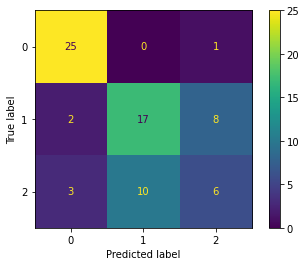

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
target_names = [0,1,2]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=target_names)
disp.plot() 

**Accuracy** = (TP + TN) / (TP + TN + FP + FN) 

True divided by all results

**Recall**  = TP / (TP + FN) 

How many yes are predicted as yes?

**Precision** = TP / (TP + FP)

How often predicting yes is correct?

**F-score** = (2* Recall* Precision)/(Recall + Precision)

### Sources:
##### Confusion matrix
https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
https://towardsdatascience.com/decoding-the-confusion-matrix-bb4801decbb

## Mae (Mean absolute error):

- measures the average magnitude of the errors in a set of forecasts, without considering their direction,
- measures accuracy for continuous variable and the equation is given in the library references,
- is the average over the verification sample of the absolute values of the differences between forecast and the corresponding observation,
- is a linear score which means that all the individual differences are weighted equally in the average.




In [5]:
# Calculating the MAE with a custom function using numpy
import numpy as np

#def mae funtion with two arrays 
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

# numpy arrays
true = [1,2,3,4,5,6]
predicted = [1,3,4,4,5,9]

# mae calculation
print("MAE PREDICTION :", mae(true, predicted))

MAE PREDICTION : 0.8333333333333334


## Let’s break down what we did here:

1. We imported numpy to make use of its array methods
2. We defined a function mae, that takes two arrays (true valuse and predictions)
3. We converted the two arrays into Numpy arrays
4. We calculated the mean of the absolute differences between iterative values in the arrays

# Sklearn to Calculate the Mean Absolute Error (MAE)

In [2]:
# Creation of MAE  using sklearn
import numpy as np
from sklearn.metrics import mean_absolute_error

#Let true value be numbers from 1 to 6
true = [1,2,3,4,5,6]

# Let the predicted values be
predicted = [1,3,4,4,5,9]

# predicted values
print("MAE: ", mean_absolute_error(true, predicted))

MAE:  0.8333333333333334


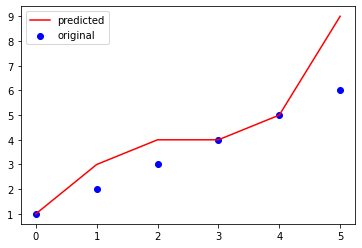

In [9]:
#We can visualize them in a plot to check the difference visually.
import matplotlib.pyplot as plt
x = list(range(len(true)))

plt.scatter(x, true, color="blue", label="original")
plt.plot(x, predicted, color="red", label="predicted")
plt.legend()
plt.show() 
 


# MSE (Mean squared error):

- measures the amount of error in statistical models,
- it assesses the average squared difference between the observed and predicted values,
- when a model has no error, the MSE equals zero. As model error increases, its value increases


## Steps to find the MSE:

1. Find the equation for the regression line.
    \begin{equation*}   \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\epsilon}_i   \end{equation*} 


2. Insert X values in the equation found in step 1 in order to get the respective Y values i.e.
  \begin{equation*} \hat{Y}_i \end{equation*}  


3. Now subtract the new Y values from the original Y values. Thus, found values are the error terms. It is also known as the vertical distance of the given point from the regression line.
   \begin{equation*}  Y_i - \hat{Y}_i  \end{equation*} 


4. Square the errors found in step 3.
   \begin{equation*}  {(Y_i - \hat{Y}_i)}^2  \end{equation*} 


5. Sum up all the squares.
   \begin{equation*}  \sum_{i=1}^{N}(Y_i - \hat{Y}_i)^2  \end{equation*} 


6. Divide the value found in step 5 by the total number of observations.
   \begin{equation*}  MSE = \frac{1}{N}\sum_{i=1}^{N}(Y_i - \hat{Y}_i)^2  \end{equation*} 

## MSE using Numpy module:

In [10]:
import numpy as np

# Given values
Y_true = [1,1,2,2,4] 

# Calculated values
Y_pred = [0.6,1.29,1.99,2.69,3.4] 

# Mean Squared Error
MSE = np.square(np.subtract(Y_true,Y_pred)).mean()

print("MSE: ", MSE)

MSE:  0.21606


## MSE using scikit – learn:

In [12]:
from sklearn.metrics import mean_squared_error

# Given values
Y_true = [1,1,2,2,4] 

# calculated values
Y_pred = [0.6,1.29,1.99,2.69,3.4] 

# Calculation of Mean Squared Error (MSE)

print("MSE: ", mean_squared_error(Y_true,Y_pred))


MSE:  0.21606


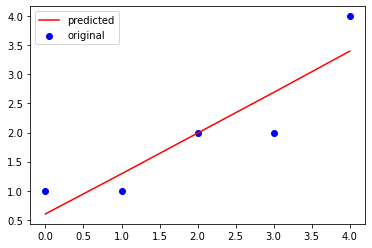

In [13]:
x = list(range(len(Y_true)))

plt.scatter(x, Y_true, color="blue", label="original")
plt.plot(x, Y_pred, color="red", label="predicted")
plt.legend()
plt.show() 